# ASSIGNMENT ON CLASSIFICATION

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data=pd.read_excel(r"C:\Users\jenan\Downloads\iris (1).xls")

# Checking the basic details of the dataset

In [3]:
#To display the first 5 rows of the dataset
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#To find the number of rows and columns in the dataset
data.shape

(150, 5)

In [5]:
#To find the column names
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
#To get informations such as number of columns,column names,number of non-null cells in each column,datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#To get statistical summary of numerical columns
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualization of the dataset

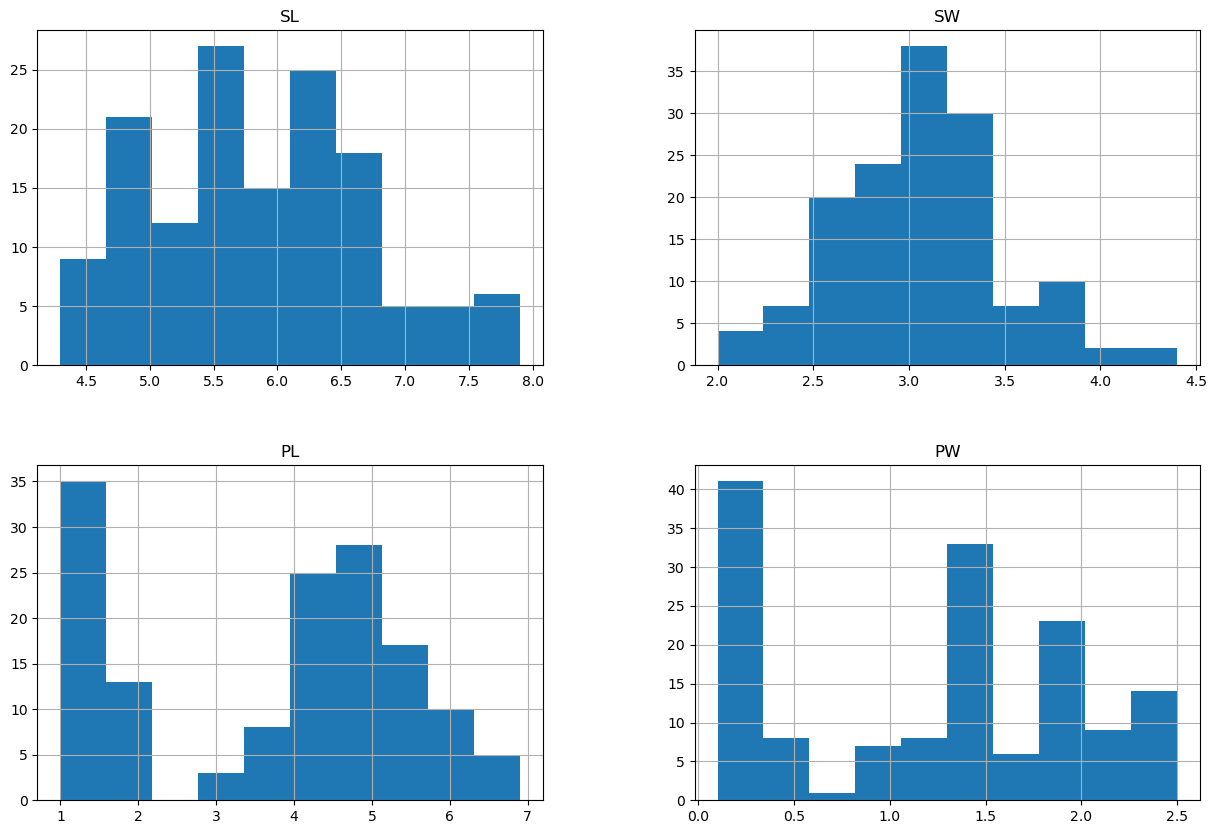

In [8]:
#To plot histogram to analyse the distribution of SL,SW,PL and PW.
data.hist(figsize = (15,10))
plt.show()

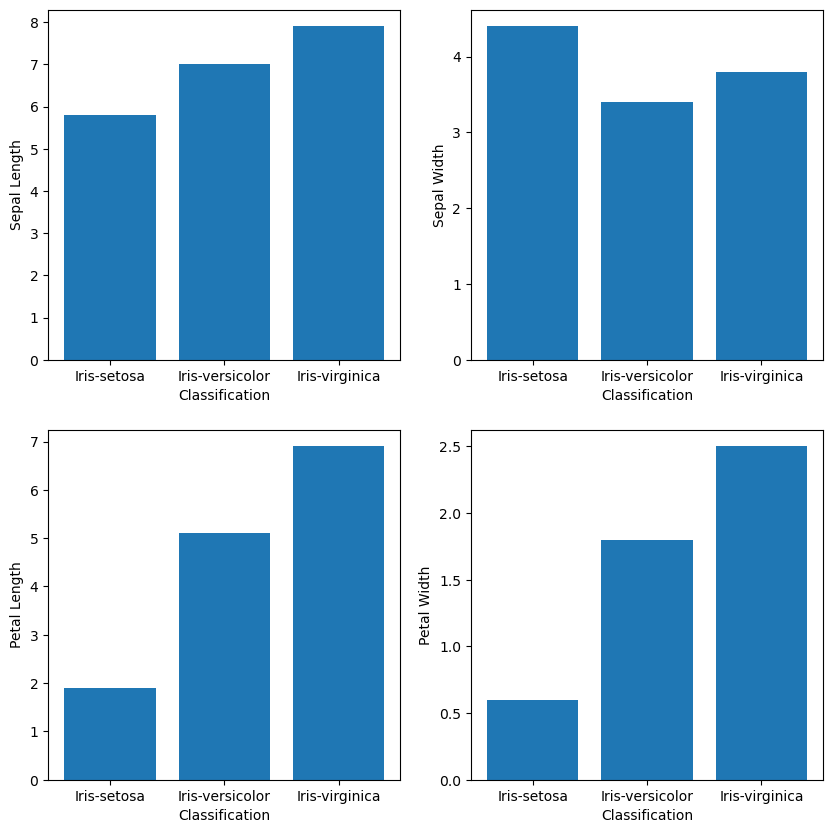

In [9]:
#To plot bar charts for analysing the 'SL','SW','PL' and 'PW' of the three species of Iris.
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.bar(data['Classification'],data['SL'])
plt.xlabel('Classification')
plt.ylabel('Sepal Length')
plt.subplot(2,2,2)
plt.bar(data['Classification'],data['SW'])
plt.xlabel('Classification')
plt.ylabel('Sepal Width')
plt.subplot(2,2,3)
plt.bar(data['Classification'],data['PL'])
plt.xlabel('Classification')
plt.ylabel('Petal Length')
plt.subplot(2,2,4)
plt.bar(data['Classification'],data['PW'])
plt.xlabel('Classification')
plt.ylabel('Petal Width')
plt.show()

# Data Preprocessing

# Data imputation

In [10]:
#Finding the number of null values in each column
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
#Filling the missing values using backward fill method
data['SL']=data['SL'].fillna(method='bfill')
data['SW']=data['SW'].fillna(method='bfill')
data['PL']=data['PL'].fillna(method='bfill')

In [12]:
#Checking for null values after filling
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now, there are no missing values.

# Outlier detection and handling

<Axes: >

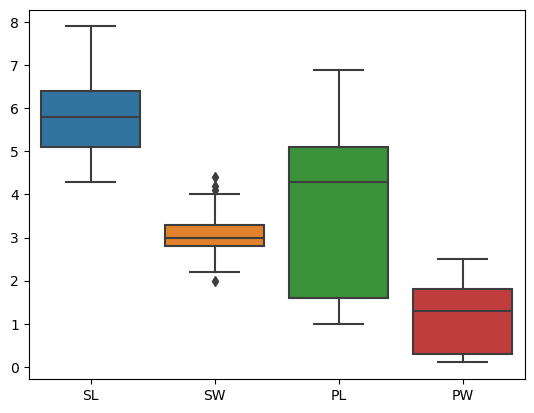

In [13]:
#Plotting the data to find outliers
df=data.drop('Classification',axis=1)
sns.boxplot(data=df)

There are outliers in 'SW'.

In [14]:
#Finding the outliers in 'SW'
Q1=np.percentile(data['SW'],25,method='midpoint')
Q2=np.percentile(data['SW'],50,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['SW']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)


First quartile,Q1 = 2.8
Second quartile,Q2 = 3.0
Third quartile,Q3 = 3.3
Inter quartile range = 0.5
Lower limit = 2.05
Upper limit = 4.05
Outliers are  [4.4, 4.1, 4.2, 2.0]


In [15]:
#Finding the index of the outliers below the lower limit
ind_1=data['SW']<low_lim
data.loc[ind_1].index

Int64Index([60], dtype='int64')

In [16]:
#Finding the index of the outliers above the upper limit
ind_2=data['SW']>up_lim
data.loc[ind_2].index

Int64Index([15, 32, 33], dtype='int64')

In [17]:
#Removing the outliers
data.drop([60,15,32,33],inplace=True)

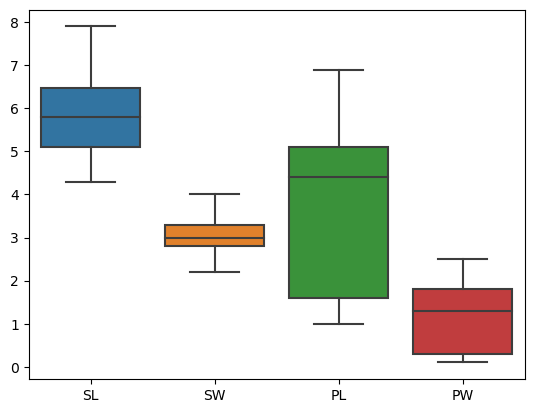

In [18]:
#Checking whether the outliers are removed
df=data.drop('Classification',axis=1)
sns.boxplot(data=df)
plt.show()

Now,there are no outliers.

# Encoding

In [19]:
#Label encoding the categorical column 'Classification'
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.6,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.4,2.0,2
148,6.2,3.4,5.4,2.3,2


# Checking Correlation

In [20]:
#Correlation matrix
data.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.148002,0.874045,0.821344,0.796331
SW,-0.148002,1.000000,-0.411160,-0.329488,-0.402182
PL,0.874045,-0.411160,1.000000,0.956883,0.947644
PW,0.821344,-0.329488,0.956883,1.000000,0.955549
Classification,0.796331,-0.402182,0.947644,0.955549,1.000000


<Axes: >

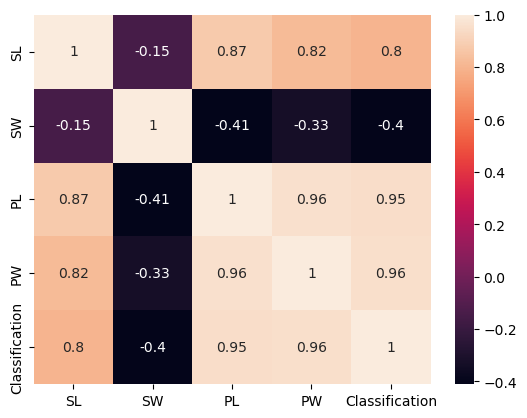

In [21]:
#Correlation heatmap
sns.heatmap(data.corr(),annot=True)

# BUILDING CLASSIFICATION MODELS

# Defining the dependent and independent variables

In [22]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

# Splitting the data into train data and test data

In [23]:
#Splitting the data in such a way that 75% data is for training and 25% is for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# LOGISTIC REGRESSION

# Model Training

In [24]:
#Defining and training(fitting) the logistic regression model using train data
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr_model=lr.fit(x_train,y_train)

In [25]:
#Predicting the output for the test data using the fitted model
lr_pred=lr_model.predict(x_test)

# Model Evaluation

In [26]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,lr_pred))

Confusion matrix : 
 [[16  0  0]
 [ 0  8  0]
 [ 0  1 12]]


In [27]:
#Evaluating the model using the metric accuracy score
lr_acc=accuracy_score(y_test,lr_pred)
print("Accuracy score :",lr_acc)
print(f"Accuracy : {lr_acc*100:.2f}%")


Accuracy score : 0.972972972972973
Accuracy : 97.30%


# K-NEAREST NEIGHBORS

In [28]:
from sklearn.neighbors import KNeighborsClassifier

#To choose the best value for K by finding the accuracy scores of the model for K values ranging from 3 to 14
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)
print("Accuracy scores for K values ranging from 3 to 14 : \n",metric_k)

Accuracy scores for K values ranging from 3 to 14 : 
 [0.972972972972973, 1.0, 1.0, 1.0, 1.0, 0.972972972972973, 0.972972972972973, 0.918918918918919, 0.972972972972973, 0.9459459459459459, 0.9459459459459459, 0.9459459459459459]


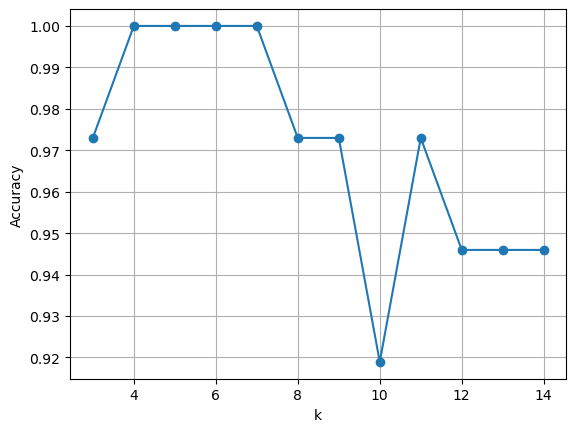

In [29]:
#Plotting the accuracy scores to find the best K value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.grid()

K values 4,5,6,7 has 100% accuracy.So we choose k to be 4.

# Model Training

In [30]:
#Defining and training(fitting) the KNN model with K=4 using train data
classifier=KNeighborsClassifier(n_neighbors=4,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [31]:
#Predicting the output for the test data using the fitted model
y_pred=classifier.predict(x_test)

# Model Evaluation

In [32]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))

Confusion matrix : 
 [[16  0  0]
 [ 0  8  0]
 [ 0  0 13]]


In [33]:
#Evaluating the model using the metric accuracy score
knn_acc=accuracy_score(y_test,y_pred)
print("Accuracy score :",knn_acc)
print(f"Accuracy : {knn_acc*100:.2f}%")


Accuracy score : 1.0
Accuracy : 100.00%


# SUPPORT VECTOR MACHINE( with Linear Kernel)

# Model Training

In [34]:
#Defining and training(fitting) the SVM model using train data
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)

In [35]:
#Predicting the output for the test data using the fitted model
y_pred_svm=svm_cls.predict(x_test)

# Model Evaluataion

In [36]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_svm))

Confusion matrix : 
 [[16  0  0]
 [ 0  8  0]
 [ 0  0 13]]


In [37]:
#Evaluating the model using the metric accuracy score
svm_acc=accuracy_score(y_test,y_pred_svm)
print("Accuracy score :",svm_acc)
print(f"Accuracy : {svm_acc*100:.2f}%")


Accuracy score : 1.0
Accuracy : 100.00%


# SUPPORT VECTOR MACHINE (with RBF Kernel)

# Model Training

In [38]:
#Defining and training(fitting) the SVM model with radial basis function kernel
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred_svm1=svm_cls1.predict(x_test)

In [39]:
#Predicting the output for the test data using the fitted model
y_pred_svm1=svm_cls1.predict(x_test)

# Model Evaluation

In [40]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_svm1))

Confusion matrix : 
 [[16  0  0]
 [ 0  8  0]
 [ 0  2 11]]


In [41]:
#Evaluating the model using the metric accuracy score
svm1_acc=accuracy_score(y_test,y_pred_svm1)
print("Accuracy score :",svm1_acc)
print(f"Accuracy : {svm1_acc*100:.2f}%")


Accuracy score : 0.9459459459459459
Accuracy : 94.59%


# DECISION TREE

# Model Training

In [42]:
#Defining and training(fitting) the decion tree model using train data
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_model=dt_cls.fit(x_train,y_train)

In [43]:
#Predicting the output for the test data using the fitted model
y_pred_dt=dt_model.predict(x_test)

# Model Evaluation

In [44]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_dt))

Confusion matrix : 
 [[16  0  0]
 [ 0  7  1]
 [ 0  1 12]]


In [45]:
#Evaluating the model using the metric accuracy score
dt_acc=accuracy_score(y_test,y_pred_dt)
print("Accuracy score :",dt_acc)
print(f"Accuracy : {dt_acc*100:.2f}%")


Accuracy score : 0.9459459459459459
Accuracy : 94.59%


# RANDOM FOREST

# Model Training

In [46]:
#Defining and training(fitting) the decion tree model using train data
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(x_train,y_train)

In [47]:
#Predicting the output for the test data using the fitted model
y_pred_rf=model_rf.predict(x_test)

# Model Evaluation

In [48]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_rf))

Confusion matrix : 
 [[16  0  0]
 [ 0  7  1]
 [ 0  1 12]]


In [49]:
#Evaluating the model using the metric accuracy score
rf_acc=accuracy_score(y_test,y_pred_rf)
print("Accuracy score :",rf_acc)
print(f"Accuracy : {rf_acc*100:.2f}%")


Accuracy score : 0.9459459459459459
Accuracy : 94.59%


# Comparing the performance of all the models

In [50]:
#Creating a dataframe for model and accuracy(in percentage) and sorting it in descending order of accuracy
results=pd.DataFrame({'Model':['Logisic Regression','K-Nearest Neighbor','SVM(Linear)','SVM(RBF)','Decision Tree','Random Forest'],
                      'Accuracy(%)':[97.30,100.00,100.00,94.59,94.59,94.59]})
results=results.sort_values(by='Accuracy(%)',ascending=False)
results=results.set_index('Model')
results

,Accuracy(%)
Model,
K-Nearest Neighbor,100.00
SVM(Linear),100.00
Logisic Regression,97.30
SVM(RBF),94.59
Decision Tree,94.59
Random Forest,94.59


Since K-Nearest Neighbor model and SVM with linear kernel model have 100% accuracy, they give the best result.